In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_data = city_data.merge(ride_data, on = 'city', how = 'outer')

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
#Get city data

cities_types = combined_data[['city','type','fare','driver_count']]
cities_types = cities_types.drop_duplicates()
cities_types = cities_types.sort_values('city')

#break up cities by type
urban_cities = cities_types[cities_types['type'] == 'Urban']
rural_cities = cities_types[cities_types['type'] == 'Rural']
suburban_cities = cities_types[cities_types['type'] == 'Suburban']

#get rides per city by type

urban_rides = urban_cities.groupby('city')
urban_rides = urban_rides.count()

rural_rides = rural_cities.groupby('city')
rural_rides = rural_rides.count()

suburban_rides = suburban_cities.groupby('city')
suburban_rides = suburban_rides.count()


#get average fare per city by type

urban_fare = urban_cities
urban_fare = urban_fare.groupby("city")
urban_fare = urban_fare.mean()

suburban_fare = suburban_cities
suburban_fare = suburban_fare.groupby("city")
suburban_fare = suburban_fare.mean()

rural_fare = rural_cities
rural_fare = rural_fare.groupby("city")
rural_fare = rural_fare.mean()


## Bubble Plot of Ride Sharing Data

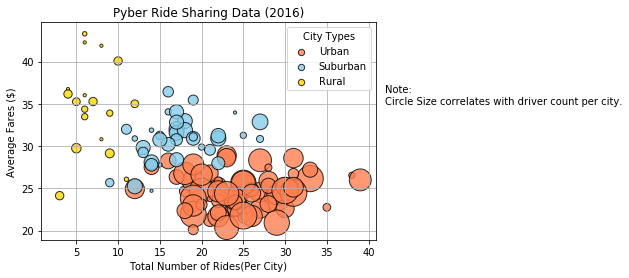

In [5]:
# Build the scatter plots for each city types
plt.scatter(urban_rides['type'],urban_fare['fare'],s = (10 * urban_fare['driver_count']),alpha =.8, c = 'Coral', edgecolors = 'black')
plt.scatter(suburban_rides['type'],suburban_fare['fare'],s = (10 * suburban_fare['driver_count']),alpha =.8, c = 'SkyBlue', edgecolors = 'black')
plt.scatter(rural_rides['type'],rural_fare['fare'],s = (10 * rural_fare['driver_count']),alpha =.8, c = 'Gold', edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fares ($)")
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
lgnd = plt.legend(title = 'City Types', labels = ['Urban','Suburban','Rural'])
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
# Incorporate a text label regarding circle size
plt.text(42,35, s='Note:\nCircle Size correlates with driver count per city.')

# Save Figure
plt.savefig('Pyber Plot')

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

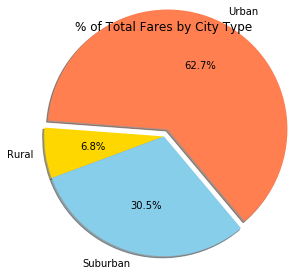

In [33]:
# Calculate Type Percents

rural_pfare = rural_cities
rural_pfare = rural_cities.sum()
rural_pfare = rural_pfare['fare']

urban_pfare = urban_cities
urban_pfare = urban_cities.sum()
urban_pfare = urban_pfare['fare']

suburban_pfare = suburban_cities
suburban_pfare = suburban_cities.sum()
suburban_pfare = suburban_pfare['fare']

# Build Pie Chart
labels = 'Urban','Rural','Suburban'
sizes = [urban_pfare, rural_pfare, suburban_pfare]
explode = (.1,0,0)
colors = 'Coral','Gold','SkyBlue'

fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle = -50, colors = colors, radius = 1.5)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.tight_layout()

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5, 1.0, '% ofTotal Rides by City Type')

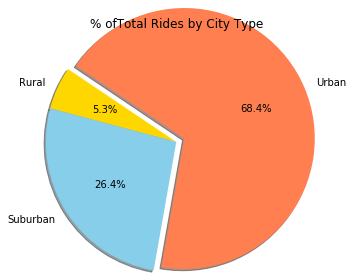

In [32]:
# Calculate Ride Percents
turban_rides = urban_rides.sum()
tsuburban_rides = suburban_rides.sum()
trural_rides = rural_rides.sum()

# Build Pie Chart
labels = 'Urban','Rural','Suburban'
sizes = [turban_rides['type'], trural_rides['type'], tsuburban_rides['type']]
explode = (.1,0,0)
colors = 'Coral','Gold','SkyBlue'

fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle = -100, colors = colors, radius = 1.5)
plt.title('% ofTotal Rides by City Type')
# Save Figure


In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers by City Type')

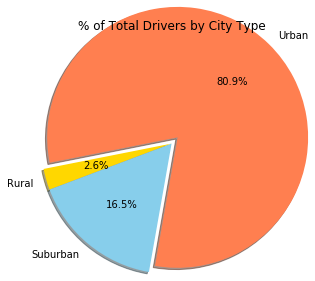

In [34]:
# Calculate Driver Percents
urban_drivers = urban_fare['driver_count'].sum()
rural_drivers = rural_fare['driver_count'].sum()
suburban_drivers = suburban_fare['driver_count'].sum()

# Build Pie Charts
labels = 'Urban','Rural','Suburban'
sizes = [urban_drivers, rural_drivers, suburban_drivers]
explode = (.1,0,0)
colors = 'Coral','Gold','SkyBlue'

fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle = -100, colors = colors, radius = 1.5)
plt.title('% of Total Drivers by City Type')
# Save Figure


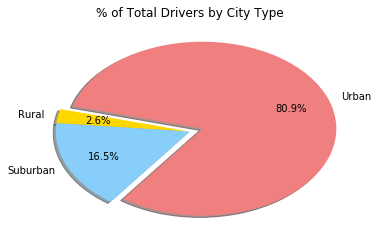

In [6]:
# Show Figure
plt.show()